In [62]:
import pandas as pd
df = pd.read_csv("/home/aayush/accelerometer/accProcess2-test/results/P001-timeSeries.csv.gz")
df.head()

,time,acc,light,moderate-vigorous,sedentary,sleep,CpSB,CpLPA,CpMPA,CpVPA,CpMVPA,MET
0,2016-11-13 02:18:00.000000+0000 [Europe/London],0.767,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.95
1,2016-11-13 02:18:30.000000+0000 [Europe/London],0.819,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.95
2,2016-11-13 02:19:00.000000+0000 [Europe/London],1.226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.95
3,2016-11-13 02:19:30.000000+0000 [Europe/London],1.292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.95
4,2016-11-13 02:20:00.000000+0000 [Europe/London],1.213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.95


In [63]:
cp_cols = df.columns.values.tolist()[6:8]
cp_cols.append(df.columns.values.tolist()[10])
activities = df[cp_cols]

# # retrieve only the activities headers
# activities = df[df.columns.values.tolist()[2:6]]


In [64]:
activities.head()

,CpSB,CpLPA,CpMVPA
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [65]:
print(len(activities))
# check if there are any rows where all the values are 0.
activities[(activities==0).all(axis=1)]

3340


,CpSB,CpLPA,CpMVPA
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
3254,0.0,0.0,0.0
3255,0.0,0.0,0.0
3256,0.0,0.0,0.0
3257,0.0,0.0,0.0


In [66]:
# check which rows do not have 1 values for either of the activity == imputed rows where there was no reading
activities[(activities!=1).all(axis=1)]

,CpSB,CpLPA,CpMVPA
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
3254,0.0,0.0,0.0
3255,0.0,0.0,0.0
3256,0.0,0.0,0.0
3257,0.0,0.0,0.0


In [67]:
# look at the values contained in row 185
activities.iloc[185]

CpSB     NaN
CpLPA    NaN
CpMVPA   NaN
Name: 185, dtype: float64

In [68]:
out = activities[activities==1].idxmax(axis=1)

print(out.unique())
print(out)

[nan 'CpSB' 'CpLPA' 'CpMVPA']
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3335    CpSB
3336    CpSB
3337    CpSB
3338    CpSB
3339    CpSB
Length: 3340, dtype: object


/tmp/ipykernel_4131495/668125663.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  out = activities[activities==1].idxmax(axis=1)


In [69]:
df["activity_predicted"] = out
print(df)
df_cleaned = df.dropna(subset=["activity_predicted"])

print(df_cleaned)
print(df_cleaned["activity_predicted"].unique())

                                                 time    acc  light  \
0     2016-11-13 02:18:00.000000+0000 [Europe/London]  0.767    0.0   
1     2016-11-13 02:18:30.000000+0000 [Europe/London]  0.819    0.0   
2     2016-11-13 02:19:00.000000+0000 [Europe/London]  1.226    0.0   
3     2016-11-13 02:19:30.000000+0000 [Europe/London]  1.292    0.0   
4     2016-11-13 02:20:00.000000+0000 [Europe/London]  1.213    0.0   
...                                               ...    ...    ...   
3335  2016-11-14 06:05:30.000000+0000 [Europe/London]  0.383    0.0   
3336  2016-11-14 06:06:00.000000+0000 [Europe/London]  0.373    0.0   
3337  2016-11-14 06:06:30.000000+0000 [Europe/London]  0.444    0.0   
3338  2016-11-14 06:07:00.000000+0000 [Europe/London]  0.572    0.0   
3339  2016-11-14 06:07:30.000000+0000 [Europe/London]  0.423    0.0   

      moderate-vigorous  sedentary  sleep  CpSB  CpLPA  CpMPA  CpVPA  CpMVPA  \
0                   0.0        0.0    1.0   0.0    0.0    0.0    0.

In [70]:
import csv
labels_dict={}
with open("/home/aayush/accelerometer/accprocess/anno-label.csv", "r") as annotation_dict:
    reader = csv.DictReader(annotation_dict)
    for row in reader:
        if labels_dict.get(row['annotation']) is None:
            labels_dict[row['annotation']] = [row['label:Walmsley2020']]
        else:
            labels_dict[row['annotation']].append(row['label:Walmsley2020'])

In [71]:
labels_dict['7030 sleeping;MET 0.95'] = [pd.NA]
print(labels_dict)
cp_labels_dict = {'CpSB': ["sedentary"], 'CpLPA': ["light"], 'CpMVPA': ["moderate-vigorous"]}
print(cp_labels_dict)

{'7030 sleeping;MET 0.95': [<NA>], 'occupation;office and administrative support;11580 office/computer work general;MET 1.5': ['sedentary'], 'home activity;household chores;preparing meals/cooking/washing dishes;5035 kitchen activity general cooking/washing/dishes/cleaning up;MET 3.3': ['light'], 'occupation;office and administrative support;11580 office wok/computer work general;MET 1.5': ['sedentary'], 'home activity;miscellaneous;sitting;9060 sitting/lying reading or without observable/identifiable activities;MET 1.3': ['sedentary'], 'home activity;miscellaneous;walking;17150 walking household without observable loads;MET 2.0': ['light'], 'transportation;private transportation;16010 driving automobile or light truck (not a semi);MET 2.5': ['sedentary'], 'home activity;miscellaneous;sitting;7010 sitting/lying and watching television with TV on as the primary activity;MET 1.0': ['sedentary'], 'home activity;miscellaneous;sitting;11580 office/computer work general;MET 1.5': ['sedentary

In [72]:
# In the annotated accelerometer data, there are 100 rows per one second.
# Also, the activity label changes every 30 seconds.

annotated_data = pd.read_csv("/home/aayush/accelerometer/accprocess/P001.csv")


/tmp/ipykernel_4131495/4269383294.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv("/home/aayush/accelerometer/accprocess/P001.csv")


In [73]:
# check label every thirty seconds
actual_labels = annotated_data[["annotation", "time"]][0::3000]
# actual_labels["time"].dtype
actual_labels

,annotation,time
0,7030 sleeping;MET 0.95,2016-11-13 02:18:00.000000
3000,7030 sleeping;MET 0.95,2016-11-13 02:18:30.000000
6000,7030 sleeping;MET 0.95,2016-11-13 02:19:00.000000
9000,7030 sleeping;MET 0.95,2016-11-13 02:19:30.000000
12000,7030 sleeping;MET 0.95,2016-11-13 02:20:00.000000
...,...,...
10008000,7030 sleeping;MET 0.95,2016-11-14 06:06:00.000000
10011000,7030 sleeping;MET 0.95,2016-11-14 06:06:30.000000
10014000,7030 sleeping;MET 0.95,2016-11-14 06:07:00.000000
10017000,7030 sleeping;MET 0.95,2016-11-14 06:07:30.000000


In [74]:
def parse_datetime(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

def parse_datetime_df_time(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    clean_datetime_str = clean_datetime_str.split('+')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

In [75]:
# df_time = df[out.notna()]["time"].apply(parse_datetime_df_time)
df_cleaned_time = df_cleaned['time'].apply(parse_datetime_df_time)
actual_time = actual_labels["time"].apply(parse_datetime)
print(actual_time)
actual_labels["time"] = actual_time

0          2016-11-13 02:18:00
3000       2016-11-13 02:18:30
6000       2016-11-13 02:19:00
9000       2016-11-13 02:19:30
12000      2016-11-13 02:20:00
                   ...        
10008000   2016-11-14 06:06:00
10011000   2016-11-14 06:06:30
10014000   2016-11-14 06:07:00
10017000   2016-11-14 06:07:30
10020000   2016-11-14 06:08:00
Name: time, Length: 3341, dtype: datetime64[ns]


In [76]:
print(actual_time.shape)
print(df_cleaned_time.shape)

(3341,)
(2080,)


In [77]:
print(actual_labels)
print(df_cleaned_time)

                      annotation                time
0         7030 sleeping;MET 0.95 2016-11-13 02:18:00
3000      7030 sleeping;MET 0.95 2016-11-13 02:18:30
6000      7030 sleeping;MET 0.95 2016-11-13 02:19:00
9000      7030 sleeping;MET 0.95 2016-11-13 02:19:30
12000     7030 sleeping;MET 0.95 2016-11-13 02:20:00
...                          ...                 ...
10008000  7030 sleeping;MET 0.95 2016-11-14 06:06:00
10011000  7030 sleeping;MET 0.95 2016-11-14 06:06:30
10014000  7030 sleeping;MET 0.95 2016-11-14 06:07:00
10017000  7030 sleeping;MET 0.95 2016-11-14 06:07:30
10020000  7030 sleeping;MET 0.95 2016-11-14 06:08:00

[3341 rows x 2 columns]
672    2016-11-13 07:54:00
673    2016-11-13 07:54:30
674    2016-11-13 07:55:00
675    2016-11-13 07:55:30
676    2016-11-13 07:56:00
               ...        
3335   2016-11-14 06:05:30
3336   2016-11-14 06:06:00
3337   2016-11-14 06:06:30
3338   2016-11-14 06:07:00
3339   2016-11-14 06:07:30
Name: time, Length: 2080, dtype: datetime6

In [78]:
# print(labels_dict)
actual_labels = actual_labels[actual_labels["time"].isin(df_cleaned_time)]
print(actual_labels)
print(actual_labels['annotation'].unique())

df_cleaned['time_cleaned'] = df_cleaned_time
print(df_cleaned[['activity_predicted', 'time_cleaned']])


                      annotation                time
2016000                      NaN 2016-11-13 07:54:00
2019000                      NaN 2016-11-13 07:54:30
2022000                      NaN 2016-11-13 07:55:00
2025000                      NaN 2016-11-13 07:55:30
2028000                      NaN 2016-11-13 07:56:00
...                          ...                 ...
10005000  7030 sleeping;MET 0.95 2016-11-14 06:05:30
10008000  7030 sleeping;MET 0.95 2016-11-14 06:06:00
10011000  7030 sleeping;MET 0.95 2016-11-14 06:06:30
10014000  7030 sleeping;MET 0.95 2016-11-14 06:07:00
10017000  7030 sleeping;MET 0.95 2016-11-14 06:07:30

[2080 rows x 2 columns]
[nan 'home activity;self care;13020 dressing/undressing;MET 2.5'
 'home activity;miscellaneous;walking;17150 walking household without observable loads;MET 2.0'
 'home activity;household chores;preparing meals/cooking/washing dishes;5035 kitchen activity general cooking/washing/dishes/cleaning up;MET 3.3'
 'transportation;private transpo

/tmp/ipykernel_4131495/2242116378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_cleaned'] = df_cleaned_time


In [79]:
flat_dict = {k: v[0] for k, v in labels_dict.items()}
actual_labels['annotation'].replace(flat_dict, inplace=True)

print(actual_labels)

         annotation                time
2016000         NaN 2016-11-13 07:54:00
2019000         NaN 2016-11-13 07:54:30
2022000         NaN 2016-11-13 07:55:00
2025000         NaN 2016-11-13 07:55:30
2028000         NaN 2016-11-13 07:56:00
...             ...                 ...
10005000       <NA> 2016-11-14 06:05:30
10008000       <NA> 2016-11-14 06:06:00
10011000       <NA> 2016-11-14 06:06:30
10014000       <NA> 2016-11-14 06:07:00
10017000       <NA> 2016-11-14 06:07:30

[2080 rows x 2 columns]


/tmp/ipykernel_4131495/3003287632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels['annotation'].replace(flat_dict, inplace=True)
/tmp/ipykernel_4131495/3003287632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_labels['annotation'].replace(flat_dict, inplace=True)


In [80]:
actual_labels_cleaned = actual_labels.dropna(subset=['annotation'])
print(actual_labels_cleaned['annotation'].unique())
print(actual_labels_cleaned)

df_cleaned_filtered = df_cleaned[df_cleaned['time_cleaned'].isin(actual_labels_cleaned["time"])]
print(df_cleaned_filtered[['activity_predicted', 'time_cleaned']])
print(df_cleaned_filtered['activity_predicted'].unique())

['light' 'sedentary' 'moderate-vigorous']
        annotation                time
2067000      light 2016-11-13 08:02:30
2070000      light 2016-11-13 08:03:00
2073000      light 2016-11-13 08:03:30
2076000      light 2016-11-13 08:04:00
2079000      light 2016-11-13 08:04:30
...            ...                 ...
7563000  sedentary 2016-11-13 23:18:30
7566000  sedentary 2016-11-13 23:19:00
7572000      light 2016-11-13 23:20:00
7575000      light 2016-11-13 23:20:30
7578000      light 2016-11-13 23:21:00

[1578 rows x 2 columns]
     activity_predicted        time_cleaned
689              CpMVPA 2016-11-13 08:02:30
690               CpLPA 2016-11-13 08:03:00
691               CpLPA 2016-11-13 08:03:30
692               CpLPA 2016-11-13 08:04:00
693                CpSB 2016-11-13 08:04:30
...                 ...                 ...
2521               CpSB 2016-11-13 23:18:30
2522               CpSB 2016-11-13 23:19:00
2524              CpLPA 2016-11-13 23:20:00
2525             CpMVPA 2

In [81]:
flat_dict = {k: v[0] for k, v in cp_labels_dict.items()}
df_cleaned_filtered['activity_predicted'].replace(flat_dict, inplace=True)

print(df_cleaned_filtered[['activity_predicted', 'time_cleaned']])
print(actual_labels_cleaned)

     activity_predicted        time_cleaned
689   moderate-vigorous 2016-11-13 08:02:30
690               light 2016-11-13 08:03:00
691               light 2016-11-13 08:03:30
692               light 2016-11-13 08:04:00
693           sedentary 2016-11-13 08:04:30
...                 ...                 ...
2521          sedentary 2016-11-13 23:18:30
2522          sedentary 2016-11-13 23:19:00
2524              light 2016-11-13 23:20:00
2525  moderate-vigorous 2016-11-13 23:20:30
2526  moderate-vigorous 2016-11-13 23:21:00

[1578 rows x 2 columns]
        annotation                time
2067000      light 2016-11-13 08:02:30
2070000      light 2016-11-13 08:03:00
2073000      light 2016-11-13 08:03:30
2076000      light 2016-11-13 08:04:00
2079000      light 2016-11-13 08:04:30
...            ...                 ...
7563000  sedentary 2016-11-13 23:18:30
7566000  sedentary 2016-11-13 23:19:00
7572000      light 2016-11-13 23:20:00
7575000      light 2016-11-13 23:20:30
7578000      light

/tmp/ipykernel_4131495/2909116469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned_filtered['activity_predicted'].replace(flat_dict, inplace=True)
/tmp/ipykernel_4131495/2909116469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtered['activity_predicted'].replace(flat_dict, inplace=True)


['light' 'sedentary' 'moderate-vigorous']
['moderate-vigorous' 'light' 'sedentary']


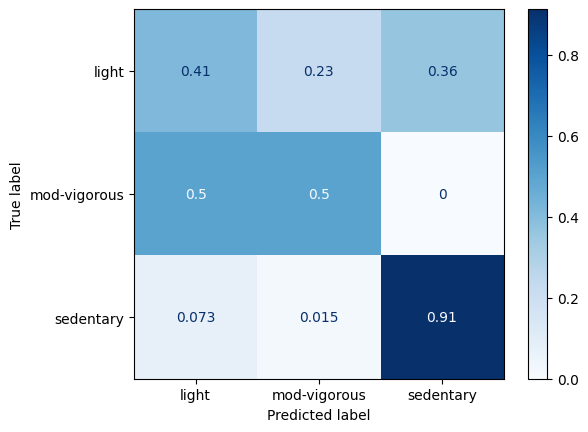

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
assert len(actual_labels_cleaned) == len(df_cleaned_filtered), "DataFrames must be of the same length"

true_labels = actual_labels_cleaned['annotation']
predicted_labels = df_cleaned_filtered['activity_predicted']

print(true_labels.unique())
print(predicted_labels.unique())

# Generate confusion matrix
# Normalize by true values
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm = confusion_matrix(true_labels, predicted_labels,  normalize='true', labels=['light', 'moderate-vigorous', 'sedentary'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['light', 'mod-vigorous', 'sedentary'])
disp.plot(cmap='Blues')  # You can change the color map as needed
